<a href="https://colab.research.google.com/github/chricannon/Predicting_popular_platforms/blob/main/Project_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question #2:
Building a linear regression model to predict song's Track Score from Spotify's 2024 Hit Song Dataset.


Import Necessary Libraries

In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

2. Loading dataset into a Pandas dataframe

In [83]:
spotify = '/content/Most Streamed Spotify Songs 24_linear_reg_dataset.csv'
df = pd.read_csv(spotify, encoding='latin-1')

Taking a peek at the dataset.

In [84]:
df.tail(4)

,Track,Album Name,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,"4,575",19.4,52282360.0,4602.0,1449767.0,56.0,9.439202e+08,5347766.0,NaN,1721.0,19935.0,24973048.0,1.0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,"4,571",19.4,189972685.0,72066.0,6704802.0,65.0,2.010273e+08,1081402.0,7596.0,5288677.0,36849005.0,29253152.0,19.0
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,"4,591",19.4,145467020.0,14037.0,7387064.0,66.0,1.118595e+09,3868828.0,11433.0,2534831.0,37757301.0,25150516.0,1.0
4599,Me Acostumbre (feat. Bad Bunny),Me Acostumbre (feat. Bad Bunny),Arcï¿½ï¿½,"4,593",19.4,255740653.0,32138.0,14066526.0,64.0,8.663008e+08,3826829.0,78000.0,10055461.0,70196388.0,175831376.0,11.0


Converting the All Time Rank column to numeric.

In [85]:
df['All Time Rank'] = pd.to_numeric(df['All Time Rank'], errors='coerce')


In [86]:
df.dtypes

,0
Track,object
Album Name,object
Artist,object
All Time Rank,float64
Track Score,float64
Spotify Streams,float64
Spotify Playlist Count,float64
Spotify Playlist Reach,float64
Spotify Popularity,float64
YouTube Views,float64


Filling any NaN values in numeric columns with the median before generating correlation matrix.

In [87]:
print(df.columns)

Index(['Track', 'Album Name', 'Artist', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count'],
      dtype='object')


In [88]:
#stripping leading/trailing spaces
df.columns = df.columns.str.strip()

In [89]:
print(df.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
All Time Rank                 3596
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
dtype: int64


In [90]:
print(df.dtypes)

Track                          object
Album Name                     object
Artist                         object
All Time Rank                 float64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
dtype: object


In [91]:
#list of numeric columns with NaN values
numeric_columns_with_nan = ['All Time Rank', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count']

In [92]:
#Fill missing values with the median for these columns
df[numeric_columns_with_nan] = df[numeric_columns_with_nan].fillna(df[numeric_columns_with_nan].median())

In [93]:
print(df[numeric_columns_with_nan].isnull().sum())

All Time Rank                 0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
dtype: int64


Generating a correlation matrix

In [94]:
#Dropping columns not to be used in the correlation matrix
spotify_corr = df.drop(['Track', 'Album Name', 'Artist','Apple Music Playlist Count', 'YouTube Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views'], axis=1)

In [95]:
spotify_corr.dtypes

,0
All Time Rank,float64
Track Score,float64
Spotify Streams,float64
Spotify Playlist Count,float64
Spotify Playlist Reach,float64
Spotify Popularity,float64


In [96]:
spotify_corr.corr()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
All Time Rank,1.000000,-0.526683,-0.120689,-0.090795,-0.254896,-0.055034
Track Score,-0.526683,1.000000,0.246756,0.188534,0.495823,0.175363
Spotify Streams,-0.120689,0.246756,1.000000,0.798704,0.578808,0.309379
Spotify Playlist Count,-0.090795,0.188534,0.798704,1.000000,0.611981,0.337574
Spotify Playlist Reach,-0.254896,0.495823,0.578808,0.611981,1.000000,0.435188
Spotify Popularity,-0.055034,0.175363,0.309379,0.337574,0.435188,1.000000


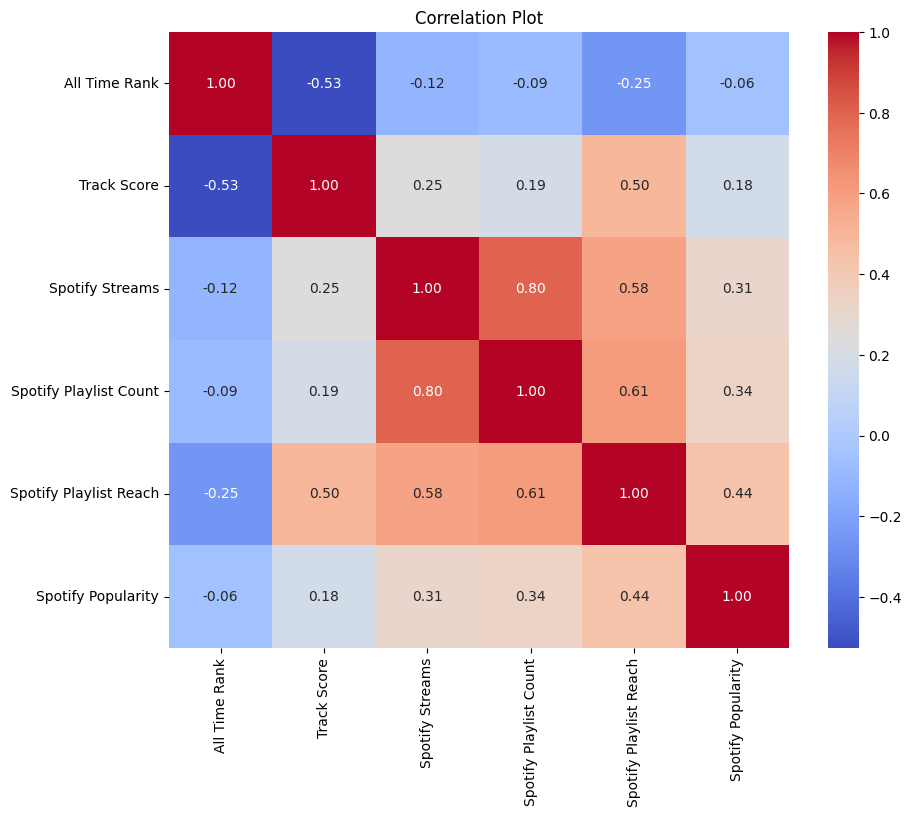

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(spotify_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()